Классические алгоритмы машинного обучения 

Используем мешок слов.

In [600]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

Константы

In [11]:
max_words = 10000
random_state = 42

In [602]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

In [603]:
emoji_dict["0"]

'smile positive/negative'

## Загружаем и готовим набор данных

In [2]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [3]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [5]:
df_em_1_token_10.groupby('word_count').count()

,img_emoji,count_emoji,emotion,tonality,class,clean_text
word_count,,,,,,
2,551,551,551,551,551,551
3,942,942,942,942,942,942
4,1076,1076,1076,1076,1076,1076
5,1127,1127,1127,1127,1127,1127
6,1216,1216,1216,1216,1216,1216
7,1089,1089,1089,1089,1089,1089
8,986,986,986,986,986,986
9,879,879,879,879,879,879
10,749,749,749,749,749,749


In [451]:
#берём текст как есть с пунктуацией и с эмодзи
def preprocess(text):
    tokens = text.lower().split()
    preprocessed_text = []
    for token in tokens:
        preprocessed_text.append(token)
    return preprocessed_text

In [497]:
import re

In [498]:
#без пунктуации и эмодзи
def preprocess_no_punct(text):
    no_punct_text = re.sub(r'[^\w\s]', ' ', text)
    tokens = no_punct_text.lower().split()
    preprocessed_text = []
    for token in tokens:
        preprocessed_text.append(token)
    return preprocessed_text

In [607]:
import pymorphy2

In [608]:
morph = pymorphy2.MorphAnalyzer()

In [609]:
#леммы без пунктуации и эмодзи
def preprocess_lemma(text):
    no_punct_text = re.sub(r'[^\w\s]', ' ', text)
    tokens = no_punct_text.lower().split()
    preprocessed_text = []
    for token in tokens:
        lemma = morph.parse(token)[0].normal_form
        preprocessed_text.append(lemma)
    return preprocessed_text

In [610]:
#леммы c пунктуацией и эмодзи
def preprocess_lemma_em(text):
    #no_punct_text = re.sub(r'[^\w\s]', ' ', text)
    #tokens = no_punct_text.lower().split()
    tokens = text.lower().split()
    preprocessed_text = []
    for token in tokens:
        lemma = morph.parse(token)[0].normal_form
        preprocessed_text.append(lemma)
    return preprocessed_text

In [499]:
preprocess_no_punct('почему бы и нет 😂')

['почему', 'бы', 'и', 'нет']

In [21]:
preprocess_lemma('почему бы и нет 😂')

['почему', 'бы', 'и', 'нет']

In [611]:
preprocess_lemma_em('почему бы и нет 😂')

['почему', 'бы', 'и', 'нет', '😂']

In [500]:
preprocess_no_punct('«бежать за любовью» - песня о том, что 😂')

['бежать', 'за', 'любовью', 'песня', 'о', 'том', 'что']

In [24]:
preprocess_lemma('«бежать за любовью» - песня о том, что 😂')

['бежать', 'за', 'любовь', 'песня', 'о', 'тот', 'что']

In [612]:
preprocess_lemma_em('«бежать за любовью» - песня о том, что 😂')

['«бежать', 'за', 'любовью»', '-', 'песня', 'о', 'том,', 'что', '😂']

In [26]:
preprocess_lemma('хорошего парня 😂')

['хороший', 'парень']

In [613]:
preprocess_lemma_em('хорошего парня 😂')

['хороший', 'парень', '😂']

In [501]:
#df_em_1_token_10['Preprocessed_texts'] = df_em_1_token_10.apply(lambda row: preprocess(row['clean_text']), axis=1)

In [614]:
#df_em_1_token_10['Preprocessed_texts_no_punct'] = df_em_1_token_10.apply(lambda row: preprocess_no_punct(row['clean_text']), axis=1)

In [615]:
df_em_1_token_10['Preprocessed_texts_lemma'] = df_em_1_token_10.apply(lambda row: preprocess_lemma_em(row['clean_text']), axis=1)

Считаем частоту слов во всех постах

In [617]:
words = Counter()

In [618]:
#for txt in df_em_1_token_10['Preprocessed_texts']:
#for txt in df_em_1_token_10['Preprocessed_texts_no_punct']:
for txt in df_em_1_token_10['Preprocessed_texts_lemma']:
    words.update(txt)

Создаем словарь, упорядоченный по частоте

В словаре будем использовать 2 специальных кода:

Код заполнитель: 0
Неизвестное слово: 1
Нумерация слов в словаре начинается с 2.

In [619]:
# Словарь, отображающий слова в коды
word_to_index = dict()
# Словарь, отображающий коды в слова
index_to_word = dict()

Создаем словари

In [620]:
for i, word in enumerate(words.most_common(max_words - 2)):
    word_to_index[word[0]] = i + 2
    index_to_word[i + 2] = word[0]

Функция для преобразования списка слов в список кодов

In [621]:
def text_to_sequence(txt, word_to_index):
    seq = []
    for word in txt:
        index = word_to_index.get(word, 1) # 1 означает неизвестное слово
        # Неизвестные слова не добавляем в выходную последовательность
        if index != 1:
            seq.append(index)
    return seq

Преобразуем все тексты в последовательность кодов слов

In [509]:
#df_em_1_token_10['Sequences'] = df_em_1_token_10.apply(lambda row: text_to_sequence(row['Preprocessed_texts'], word_to_index), axis=1)

In [622]:
#df_em_1_token_10['Sequences'] = df_em_1_token_10.apply(lambda row: text_to_sequence(row['Preprocessed_texts_no_punct'], word_to_index), axis=1)

In [623]:
df_em_1_token_10['Sequences'] = df_em_1_token_10.apply(lambda row: text_to_sequence(row['Preprocessed_texts_lemma'], word_to_index), axis=1)

## Готовим данные для обучения

### Выделяем данные для обучения и тестирования

In [12]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2, random_state = random_state)

In [15]:
len(train) + len(test)

9220

### Разделяем метки классов и данные для обучения

Данные для обучения

In [629]:
x_train_seq = train['Sequences']
y_train = train['class']

In [630]:
x_train_seq

5559                         [519, 51, 42, 2, 9487]
8376                          [5, 17, 1021, 3, 395]
5562                   [361, 134, 50, 375, 113, 10]
1491                               [27, 241, 8, 11]
6375                                      [63, 143]
                           ...                     
5734                                         [9703]
5191                                 [2, 680, 9007]
5390    [14, 5, 50, 9256, 1324, 9257, 9, 541, 9258]
860                               [4024, 4025, 302]
7270                                      [54, 755]
Name: Sequences, Length: 7376, dtype: object

In [631]:
y_train

5559    0
8376    0
5562    0
1491    0
6375    1
       ..
5734    0
5191    0
5390    4
860     9
7270    0
Name: class, Length: 7376, dtype: int64

Данные для тестирования

In [632]:
x_test_seq = test['Sequences']
y_test = test['class']

In [633]:
x_test_seq

7810                                [97, 5, 248, 3096, 3]
1180                                   [2, 1946, 7, 1947]
5865                           [67, 58, 19, 34, 50, 9885]
623                   [4, 50, 2095, 1113, 3803, 1466, 11]
711                               [3926, 152, 1115, 3927]
                              ...                        
4401                                    [5, 17, 8081, 15]
7481                                            [179, 11]
4467                                           [78, 8153]
4539    [4, 8238, 645, 278, 154, 8, 31, 185, 197, 17, ...
1323              [16, 594, 2265, 2257, 14, 12, 24, 4485]
Name: Sequences, Length: 1844, dtype: object

In [634]:
y_test

7810    0
1180    0
5865    2
623     0
711     5
       ..
4401    0
7481    0
4467    4
4539    0
1323    2
Name: class, Length: 1844, dtype: int64

## Создаем мешок слов

In [635]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for index in sequence:
            results[i, index] += 1.
    return results

In [636]:
import numpy as np

In [637]:
x_train = vectorize_sequences(x_train_seq, max_words)

In [638]:
x_test = vectorize_sequences(x_test_seq, max_words)

In [639]:
x_train[0][:100]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [640]:
len(x_train[0])

10000

## Создаем модели машинного обучения

In [641]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    f1_macro = f1_score(y_test, clf.predict(X_test), average='macro')
    f1_micro = f1_score(y_test, clf.predict(X_test), average='micro')
    f1_weighted = f1_score(y_test, clf.predict(X_test), average='weighted')
    return train_acc, test_acc, f1_macro, f1_micro, f1_weighted

In [642]:
lr = LogisticRegression(random_state=random_state, max_iter=500)
svc = SVC(probability=True)
rforest = RandomForestClassifier(random_state=random_state)
dtree = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier(random_state=random_state)

In [643]:
clifs = [lr, svc, rforest, dtree, nb, gb]

# Ансамблевые методы

## Мажоритарное голосование

In [644]:
from sklearn.ensemble import VotingClassifier

In [645]:
eclf_hard = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('rforest', rforest), ('dtree', dtree), ('nb', nb), ('gb', gb)], voting='hard')

In [646]:
eclf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500,
                                                 random_state=42)),
                             ('svc', SVC(probability=True)),
                             ('rforest',
                              RandomForestClassifier(random_state=42)),
                             ('dtree', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))])

In [647]:
predicted = eclf_hard.predict(x_test)

In [263]:
#Preprocessed_texts

In [264]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1166
           1       0.98      0.53      0.69       203
           2       0.99      0.56      0.71       152
           3       1.00      0.56      0.72       101
           4       1.00      0.60      0.75        86
           5       1.00      0.42      0.59        26
           6       1.00      0.62      0.77        24
           7       1.00      0.47      0.64        15
           8       1.00      0.50      0.67        14
           9       1.00      0.67      0.80        18
          10       0.80      0.50      0.62         8
          11       1.00      0.40      0.57        15
          12       0.67      0.18      0.29        11
          13       1.00      1.00      1.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.83      1844
   macro avg       0.88      0.53      0.65      1844
weighted avg       0.86   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
import matplotlib.pyplot as plt

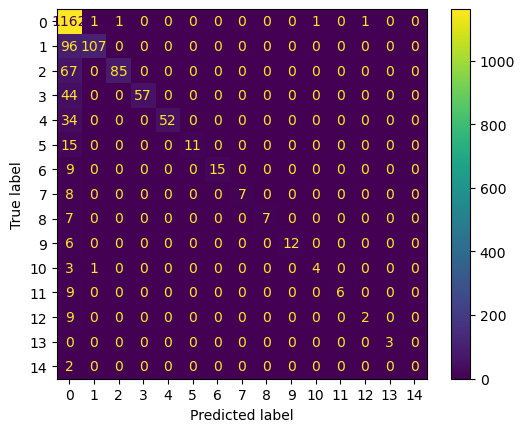

In [266]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [267]:
def scores(clf, X_train, X_test, y_train, y_test):
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    f1_macro = f1_score(y_test, clf.predict(X_test), average='macro')
    f1_micro = f1_score(y_test, clf.predict(X_test), average='micro')
    f1_weighted = f1_score(y_test, clf.predict(X_test), average='weighted')
    return train_acc, test_acc, f1_macro, f1_micro, f1_weighted

In [268]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_hard.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_hard, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.9224512 |     0.8297180 | 0.6464009 | 0.8297180 |   0.8134121 |


In [433]:
#Preprocessed_texts_no_punct

In [434]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1166
           1       0.60      0.01      0.03       203
           2       0.70      0.09      0.16       152
           3       0.33      0.01      0.02       101
           4       0.67      0.05      0.09        86
           5       0.75      0.12      0.20        26
           6       0.40      0.08      0.14        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        14
           9       0.43      0.17      0.24        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       1.00      0.33      0.50         3
          14       0.00      0.00      0.00         2

    accuracy                           0.64      1844
   macro avg       0.37      0.12      0.14      1844
weighted avg       0.60   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


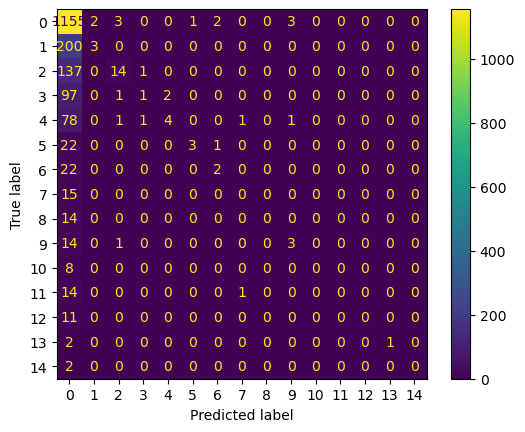

In [435]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [436]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_hard.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_hard, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.8493764 |     0.6431670 | 0.1437968 | 0.6431670 |   0.5234418 |


In [648]:
#Preprocessed_texts_lemma_em

In [649]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1166
           1       1.00      0.53      0.69       203
           2       0.99      0.55      0.70       152
           3       1.00      0.58      0.74       101
           4       1.00      0.60      0.75        86
           5       1.00      0.38      0.56        26
           6       1.00      0.62      0.77        24
           7       1.00      0.47      0.64        15
           8       1.00      0.50      0.67        14
           9       1.00      0.67      0.80        18
          10       1.00      0.50      0.67         8
          11       1.00      0.47      0.64        15
          12       0.00      0.00      0.00        11
          13       1.00      1.00      1.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.83      1844
   macro avg       0.85      0.53      0.63      1844
weighted avg       0.86   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


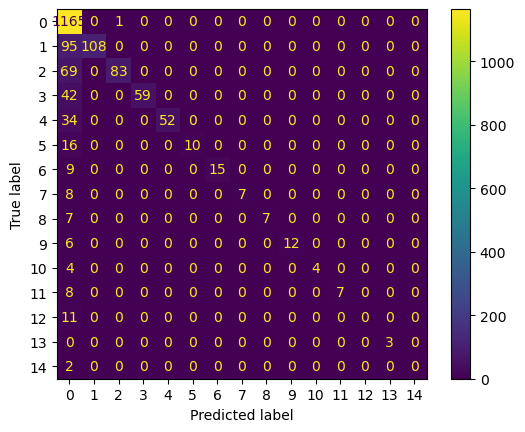

In [650]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [651]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_hard.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_hard, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.9296367 |     0.8308026 | 0.6334534 | 0.8308026 |   0.8132172 |


## Мягкое голосование

In [652]:
eclf_soft = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('rforest', rforest), ('dtree', dtree), ('nb', nb), ('gb', gb)], voting='soft')

In [653]:
eclf_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500,
                                                 random_state=42)),
                             ('svc', SVC(probability=True)),
                             ('rforest',
                              RandomForestClassifier(random_state=42)),
                             ('dtree', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [654]:
predicted = eclf_soft.predict(x_test)

In [486]:
#Preprocessed_texts

In [487]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1166
           1       0.87      0.55      0.67       203
           2       0.95      0.57      0.71       152
           3       0.95      0.60      0.74       101
           4       1.00      0.63      0.77        86
           5       1.00      0.50      0.67        26
           6       1.00      0.62      0.77        24
           7       0.90      0.60      0.72        15
           8       1.00      0.50      0.67        14
           9       1.00      0.78      0.88        18
          10       0.80      0.50      0.62         8
          11       1.00      0.60      0.75        15
          12       0.80      0.36      0.50        11
          13       0.75      1.00      0.86         3
          14       0.00      0.00      0.00         2

    accuracy                           0.83      1844
   macro avg       0.85      0.59      0.68      1844
weighted avg       0.85   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


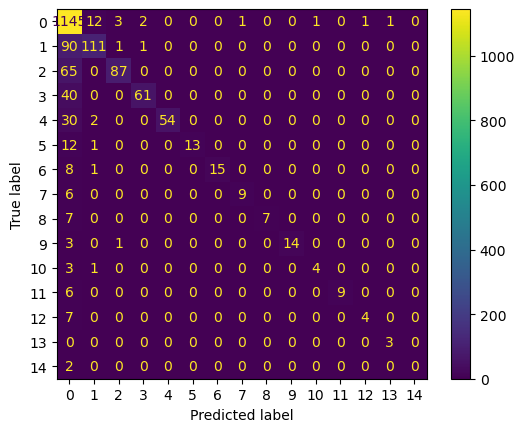

In [488]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [489]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_soft.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_soft, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.9741052 |     0.8329718 | 0.6799262 | 0.8329718 |   0.8201903 |


In [536]:
#Preprocessed_texts_no_punct

In [537]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78      1166
           1       0.19      0.05      0.08       203
           2       0.50      0.16      0.25       152
           3       0.15      0.02      0.04       101
           4       0.40      0.09      0.15        86
           5       0.38      0.12      0.18        26
           6       0.20      0.08      0.12        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        14
           9       0.33      0.28      0.30        18
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        11
          13       0.33      0.33      0.33         3
          14       0.00      0.00      0.00         2

    accuracy                           0.63      1844
   macro avg       0.21      0.14      0.15      1844
weighted avg       0.52   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


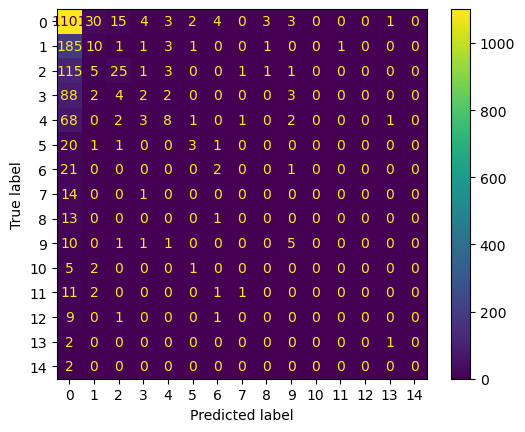

In [538]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [539]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_soft.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_soft, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.9654284 |     0.6274403 | 0.1480374 | 0.6274403 |   0.5375226 |


In [655]:
#Preprocessed_texts_lemma_em

In [656]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1166
           1       0.93      0.54      0.68       203
           2       0.95      0.57      0.71       152
           3       0.95      0.59      0.73       101
           4       1.00      0.62      0.76        86
           5       1.00      0.50      0.67        26
           6       1.00      0.62      0.77        24
           7       1.00      0.53      0.70        15
           8       1.00      0.50      0.67        14
           9       0.93      0.78      0.85        18
          10       1.00      0.50      0.67         8
          11       1.00      0.60      0.75        15
          12       1.00      0.45      0.62        11
          13       1.00      1.00      1.00         3
          14       0.00      0.00      0.00         2

    accuracy                           0.83      1844
   macro avg       0.90      0.59      0.70      1844
weighted avg       0.86   

/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kholann/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


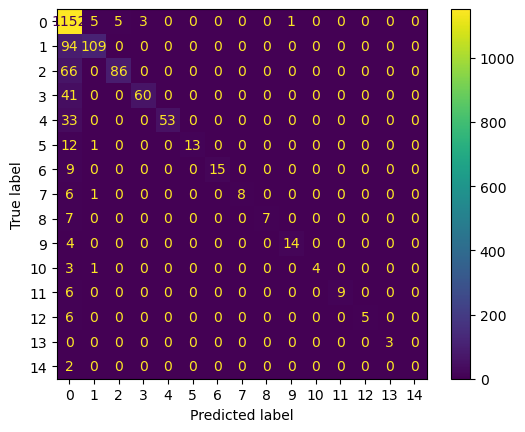

In [657]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14"])

cm_display.plot()
plt.show()

In [658]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
clf_name = eclf_soft.__class__.__name__
train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = scores(eclf_soft, x_train, x_test, y_train, y_test)
print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| VotingClassifier          |         0.9842733 |     0.8340564 | 0.6970339 | 0.8340564 |   0.8205762 |


## Обучаем модели машинного обучения

In [275]:
#Preprocessed_texts

In [276]:
# train and test them 
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = train_test(clf, x_train, x_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| LogisticRegression        |         0.8966920 |     0.8134490 | 0.5174497 | 0.8134490 |   0.7897178 |
| SVC                       |         0.8695770 |     0.7635575 | 0.4026080 | 0.7635575 |   0.7221122 |
| RandomForestClassifier    |         0.9840022 |     0.8172451 | 0.6509571 | 0.8172451 |   0.8054491 |
| DecisionTreeClassifier    |         0.9840022 |     0.8015184 | 0.6378899 | 0.8015184 |   0.7945385 |
| GaussianNB                |         0.8442245 |     0.5764642 | 0.2849338 | 0.5764642 |   0.6217466 |
| GradientBoostingClassifier |         0.8731020 |     0.8286334 | 0.6526506 | 0.8286334 |   0.8148045 |


In [541]:
#Preprocessed_texts_no_punct

In [542]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = train_test(clf, x_train, x_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| LogisticRegression        |         0.7962310 |     0.6372017 | 0.0832547 | 0.6372017 |   0.5218666 |
| SVC                       |         0.7177332 |     0.6393709 | 0.0699764 | 0.6393709 |   0.5059810 |
| RandomForestClassifier    |         0.9819685 |     0.6127983 | 0.1536240 | 0.6127983 |   0.5305974 |
| DecisionTreeClassifier    |         0.9819685 |     0.5455531 | 0.1341763 | 0.5455531 |   0.5056686 |
| GaussianNB                |         0.7754881 |     0.3416486 | 0.1086380 | 0.3416486 |   0.3911087 |
| GradientBoostingClassifier |         0.7341377 |     0.6252711 | 0.1258174 | 0.6252711 |   0.5135137 |


In [660]:
#Preprocessed_texts_lemma_em

In [661]:
print("| {:25} | {} | {} | {} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy", "F1_macro", "F1_micro", "F1_weighted"))
print("| {} | {} | {} | {} | {} | {} |".format("-"*25, "-"*17, "-"*13, "-"*8, "-"*8, "-"*11))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, f1_macro, f1_micro, f1_weighted  = train_test(clf, x_train, x_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} | {:8.7f} | {:8.7f} | {:11.7f} |".format(clf_name, train_acc, test_acc, f1_macro, f1_micro, f1_weighted))

| Classifier                | Training Accuracy | Test Accuracy | F1_macro | F1_micro | F1_weighted |
| ------------------------- | ----------------- | ------------- | -------- | -------- | ----------- |
| LogisticRegression        |         0.9034707 |     0.8101952 | 0.5148780 | 0.8101952 |   0.7863667 |
| SVC                       |         0.8661876 |     0.7630152 | 0.4015703 | 0.7630152 |   0.7211327 |
| RandomForestClassifier    |         0.9921367 |     0.8275488 | 0.6676540 | 0.8275488 |   0.8142656 |
| DecisionTreeClassifier    |         0.9921367 |     0.8009761 | 0.6629572 | 0.8009761 |   0.7928059 |
| GaussianNB                |         0.8888286 |     0.5596529 | 0.2725690 | 0.5596529 |   0.6074356 |
| GradientBoostingClassifier |         0.8751356 |     0.8313449 | 0.6700886 | 0.8313449 |   0.8174398 |


## Оцениваем качество обучения на тестовом наборе данных

Определяем долю правильных ответов (accuracy) на тестовом наборе данных

In [662]:
#Preprocessed_texts_lemma_em

In [663]:
# Мажоритарное голосование

In [664]:
eclf_hard.score(x_test, y_test)

0.8308026030368764

In [665]:
# Мягкое голосование

In [666]:
eclf_soft.score(x_test, y_test)

0.834056399132321

In [667]:
# LogisticRegression
lr.score(x_test, y_test)

0.8101952277657267

In [668]:
# SVC
svc.score(x_test, y_test)

0.7630151843817787

In [670]:
# RandomForestClassifier
rforest.score(x_test, y_test)

0.8275488069414316

In [671]:
# DecisionTreeClassifier
dtree.score(x_test, y_test)

0.8009761388286334

In [672]:
# GaussianNB
nb.score(x_test, y_test)

0.559652928416486

In [673]:
# GradientBoostingClassifier
gb.score(x_test, y_test)

0.8313449023861171

In [676]:
# df_em_1_token_10 9220 записей c clean_text
# 0.8210412147505423 на тексте как есть с пунктуацией и с эмодзи
# 0.6518438177874186 на тексте без пунктуации и без эмодзи
# 0.8167028199566161 лемматизированный текст c пунктуацией и с эмодзи

In [678]:
# df_em_1_token_10 9220 записей c clean_text
# на тексте как есть с пунктуацией и с эмодзи

# f1_score macro  = 0.5276053318409015
# f1_score micro = 0.8210412147505423
# f1_score weighted = 0.7997645366449052
# f1_score average=None array([0.87779434, 0.66049383, 0.70292887, 0.68531469, 0.69565217,
 #      0.52173913, 0.78947368, 0.74074074, 0.75862069, 0.68965517,
  #     0.66666667, 0.125     , 0.        , 0.        , 0.        ])


# на тексте без пунктуации и без эмодзи
# f1_score macro  = 0.10245011355819066
# f1_score micro = 0.6518438177874186
# f1_score weighted = 0.5475694579186766
# f1_score average = None 
# array([0.78886626, 0.05106383, 0.27979275, 0.06      , 0.02380952,
#       0.07692308, 0.        , 0.        , 0.        , 0.15384615,
#       0.        , 0.        , 0.        , 0.        ])

# лемматизированный текст c пунктуацией и с эмодзи
# f1_score macro  = 0.4759290806236384
# f1_score micro = 0.8167028199566161
# f1_score weighted = 0.7936116041387886
# f1_score average = None 
# array([0.87647929, 0.71005917, 0.64356436, 0.68789809, 0.61946903,
#       0.45454545, 0.77419355, 0.66666667, 0.6       , 0.60606061,
#       0.5       , 0.        , 0.        , 0.        , 0.        ])

Применяем модель

In [679]:
len(test)

1844

In [681]:
#test['clean_text'][12737]
#test['clean_text'][5080]

In [682]:
#test['class'][12737], test['emotion'][12737], test['tonality'][12737]
#test['class'][5080], test['emotion'][5080], test['tonality'][5080]

In [683]:
#text = "возможно его уже нет в живых 😭"
#text = "Хех и сразу музыка в голове"
#text = "я даже неделю не могу продержаться 😭"
#text = test['clean_text'][12737]
#text = test['clean_text'][5080]
text = "жизнь прекрасна!"

Подготовка текста к обработке

In [684]:
preprocessed_text = preprocess_lemma_em(text)

In [685]:
preprocessed_text

['жизнь', 'прекрасна!']

In [686]:
text_seq = text_to_sequence(preprocessed_text, word_to_index)

In [687]:
text_seq

[113]

In [688]:
text_bow = vectorize_sequences([text_seq], max_words)

In [689]:
text_bow[0][0:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Выполняем распознавание

In [690]:
# Мажоритарное голосование

In [691]:
result = eclf_hard.predict(text_bow)

In [692]:
result, emoji_dict[str(result[0])]

(array([0]), 'smile positive/negative')

In [693]:
# Мягкое голосование

In [694]:
result = eclf_soft.predict(text_bow)

In [695]:
result, emoji_dict[str(result[0])]

(array([0]), 'smile positive/negative')

In [696]:
result_clf = []
for clf in clifs:
    result_clf.append(clf.predict(text_bow))

In [697]:
result_clf

[array([0]), array([0]), array([0]), array([0]), array([10]), array([0])]

In [698]:
for i in range(0, len(result_clf)):
    res = result_clf[i][0]
    print(res, emoji_dict[str(res)])

0 smile positive/negative
0 smile positive/negative
0 smile positive/negative
0 smile positive/negative
10 disgust neutral/skeptical
0 smile positive/negative


In [699]:
#i = 0
#while i < len(result_clf):
 #   print(emoji_dict[str(result_clf[i][0])])
  #  i += 1

In [700]:
# Мажоритарное голосование

In [701]:
result = eclf_hard.predict_proba(text_bow)

AttributeError: predict_proba is not available when voting='hard'

In [702]:
# Мягкое голосование

In [703]:
result = eclf_soft.predict_proba(text_bow)

In [704]:
result

array([[6.15838924e-01, 7.68408451e-02, 5.10613819e-02, 2.10806196e-02,
        3.14302450e-02, 9.47661428e-03, 4.58606832e-03, 6.60410633e-03,
        6.76237926e-03, 6.53106040e-03, 1.67558090e-01, 8.64559804e-04,
        6.29838909e-04, 5.16583664e-04, 2.18682970e-04]])

In [705]:
i = 0
while i < len(result[0]):
    print(str(i) +": "+ emoji_dict[str(i)], round(result[0][i], 3))
    i += 1

0: smile positive/negative 0.616
1: no_emotion neutral/skeptical 0.077
2: joy positive 0.051
3: no_emotion positive/negative 0.021
4: sadness negative 0.031
5: fear negative 0.009
6: shame negative 0.005
7: anger negative 0.007
8: disgust negative 0.007
9: surprise positive/negative 0.007
10: disgust neutral/skeptical 0.168
11: surprise negative 0.001
12: no_emotion negative 0.001
13: sadness positive/negative 0.001
14: fear positive/negative 0.0


In [706]:
# LogisticRegression       
# SVC                       
# RandomForestClassifier    
# DecisionTreeClassifier    
# GaussianNB               
# GradientBoostingClassifier

In [707]:
#result = []
for clf in clifs:
    try:
        result = clf.predict_proba(text_bow)
        #result.append(clf.predict_proba(text_bow))
        #print("\n")
        print(clf.__class__.__name__ + ":")
        #print(result)
        i = 0
        while i < len(result[0]):
            print(str(i) +": "+ emoji_dict[str(i)], round(result[0][i], 3))
            i += 1
    except:
        print(clf.__class__.__name__)
        print("No predict_proba")

LogisticRegression:
0: smile positive/negative 0.627
1: no_emotion neutral/skeptical 0.114
2: joy positive 0.103
3: no_emotion positive/negative 0.046
4: sadness negative 0.048
5: fear negative 0.011
6: shame negative 0.009
7: anger negative 0.009
8: disgust negative 0.009
9: surprise positive/negative 0.01
10: disgust neutral/skeptical 0.004
11: surprise negative 0.005
12: no_emotion negative 0.003
13: sadness positive/negative 0.003
14: fear positive/negative 0.001
SVC:
0: smile positive/negative 0.837
1: no_emotion neutral/skeptical 0.074
2: joy positive 0.042
3: no_emotion positive/negative 0.012
4: sadness negative 0.018
5: fear negative 0.004
6: shame negative 0.003
7: anger negative 0.002
8: disgust negative 0.002
9: surprise positive/negative 0.002
10: disgust neutral/skeptical 0.002
11: surprise negative 0.001
12: no_emotion negative 0.001
13: sadness positive/negative 0.001
14: fear positive/negative 0.0
RandomForestClassifier:
0: smile positive/negative 0.752
1: no_emotion n